In [1]:
#Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import csv
import os
import requests
import time
from scipy.stats import linregress

In [2]:
#reading in data path
spotify_path = "C:/Users/ashuu/OneDrive/Documents/GitHub/Project-1/spotify_dataset.csv"
music_data = pd.read_csv(spotify_path)

In [3]:
#creating dataframe based on my specific artist, Drake
artist_count = (music_data[music_data["Artist"] == "Drake"]).copy()
artist_count

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
81,82,6,21,2021-03-05--2021-03-12,Wants and Needs (feat. Lil Baby),"7,637,626",Drake,56308172,65OVbaJR5O1RmwOQx0875b,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.578,0.449,-6.349,0.286,0.0618,0.119,136.006,192956,0.1,C#/Db
290,291,2,44,2020-08-14--2020-08-21,Laugh Now Cry Later (feat. Lil Durk),"4,916,860",Drake,56308172,2SAqBLGA283SUiwJ3xOUVI,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.761,0.518,-8.871,0.134,0.244,0.107,133.976,261493,0.522,C
350,351,2,12,2021-03-05--2021-03-12,What’s Next,"5,335,112",Drake,56308172,3aQem4jVGdhtg116TmJnHz,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.781,0.594,-6.959,0.0485,0.0136,0.162,129.895,178154,0.0628,C
472,473,17,4,2021-03-05--2021-03-12,Lemon Pepper Freestyle (feat. Rick Ross),"5,365,747",Drake,56327031,4FRW5Nza1Ym91BGV4nFWXI,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.77,0.637,-5.53,0.345,0.103,0.171,94.966,383037,0.431,C#/Db
549,550,2,46,2020-05-01--2020-05-08,Toosie Slide,"4,966,878",Drake,56327031,127QTOFJsJQp5LbJbu3A1y,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.834,0.454,-9.75,0.201,0.321,0.114,81.618,247059,0.837,C#/Db
893,894,23,21,2020-05-01--2020-05-08,Chicago Freestyle (feat. Giveon),"4,799,038",Drake,56327031,4wVOKKEHUJxHCFFNUWDn0B,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.735,0.449,-7.507,0.347,0.629,0.113,122.947,220488,0.0397,A#/Bb
1073,1074,88,27,2020-01-03--2020-01-10,Money In The Grave (Drake ft. Rick Ross),"4,403,348",Drake,56327031,5ry2OE6R2zPQFDO85XkgRb,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.831,0.502,-4.045,0.046,0.101,0.122,100.541,205427,0.101,A#/Bb
1171,1172,12,3,2020-05-01--2020-05-08,Pain 1993 (with Playboi Carti),"6,085,143",Drake,56327031,6Kj17Afjo1OKJYpf5VzCeo,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.825,0.373,-5.532,0.108,0.163,0.368,77.271,149078,0.12,F
1188,1189,49,2,2020-05-01--2020-05-08,Demons (feat. Fivio Foreign & Sosa Geek),"4,766,829",Drake,56327031,05aZ9sAU1YXndHv0FMi9iW,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.543,0.766,-3.387,0.343,0.423,0.155,106.869,204805,0.729,C
1197,1198,51,1,2020-05-01--2020-05-08,Time Flies,"9,904,749",Drake,56327031,5H4mXWKcicuLKDn4Jy0sK7,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.864,0.477,-5.786,0.224,0.201,0.182,86.46,192932,0.5,A#/Bb


In [4]:
# Drake's Total Followers 
artist_followers = artist_count["Artist Followers"].max()
artist_followers

'56327031'

In [5]:
# Drake's streams for each song
artist_streams = artist_count["Streams"].unique()
artist_streams 

array(['7,637,626', '4,916,860', '5,335,112', '5,365,747', '4,966,878',
       '4,799,038', '4,403,348', '6,085,143', '4,766,829', '9,904,749',
       '9,628,215', '9,284,383', '8,355,036', '8,304,928', '8,285,754',
       '7,821,869', '7,216,610', '6,894,756', '4,565,400'], dtype=object)

In [6]:
#Drake's total number of songs
song_count = artist_count["Song ID"].count()
song_count

19

In [7]:
#Drake's largest streaming number
artist_maxstreams = artist_count["Streams"].max()
artist_maxstreams 

'9,904,749'

In [8]:
#Finding out whether Drake has topped the charts
if len(artist_count.loc[artist_count["Highest Charting Position"] == 1]) > 0:
    print("Drake has topped the chart")
else:
    print("Drake has not topped the chart")

Drake has not topped the chart


In [9]:
#Finding types of each of the columns in the dataframe
result = artist_count.dtypes
result

Index                         int64
Highest Charting Position     int64
Number of Times Charted       int64
Week of Highest Charting     object
Song Name                    object
Streams                      object
Artist                       object
Artist Followers             object
Song ID                      object
Genre                        object
Release Date                 object
Weeks Charted                object
Popularity                   object
Danceability                 object
Energy                       object
Loudness                     object
Speechiness                  object
Acousticness                 object
Liveness                     object
Tempo                        object
Duration (ms)                object
Valence                      object
Chord                        object
dtype: object

In [10]:
#artist_count['Streams'] = pd.to_numeric(artist_count['Streams'])
#Converting column to int
artist_count["Streams"] = artist_count["Streams"].str.replace(",","").astype(int)
#doja_cat_df[“Streams”] = doja_cat_df[“Streams”].str.replace(“,”,“”).astype(int)


In [11]:
#Drake's total streams
artist_totalstreams = artist_count["Streams"].sum()
artist_totalstreams

128538281

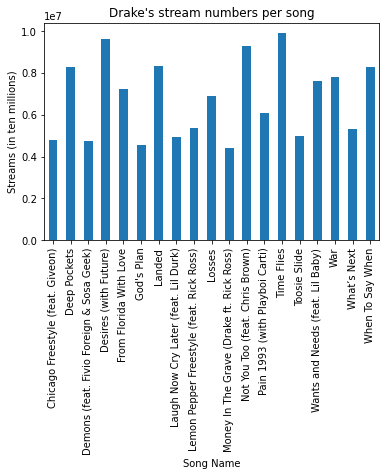

In [12]:
#Bar graph visualizing number of streams per song for Drake
bar_graph = artist_count.groupby('Song Name')['Streams'].sum()
bar_graph.plot(kind="bar", x="Song Name", y="Streams")
plt.title("Drake's stream numbers per song")
plt.xlabel("Song Name")
plt.ylabel("Streams (in ten millions)")
plt.xticks(rotation = 90)
plt.savefig("Drake_bargraph.png")
plt.show()

In [64]:
#Creating similar dataframes for the other chosen artists
weeknd_count = (music_data[music_data["Artist"] == "The Weeknd"]).copy()
sheeran_count = (music_data[music_data["Artist"] == "Ed Sheeran"]).copy()
doja_count = (music_data[music_data["Artist"] == "Doja Cat"]).copy()

In [65]:
#Follower count for each artist
weeknd_followers = weeknd_count["Artist Followers"].max()
sheeran_followers = sheeran_count["Artist Followers"].max()
doja_followers = doja_count["Artist Followers"].max()

print(weeknd_followers)
print(sheeran_followers)
print(doja_followers)

35340069
83337783
8671649


In [66]:
#Converting column data to int for each dataframe
weeknd_count["Streams"] = weeknd_count["Streams"].str.replace(",","").astype(int)
sheeran_count["Streams"] = sheeran_count["Streams"].str.replace(",","").astype(int)
doja_count["Streams"] = doja_count["Streams"].str.replace(",","").astype(int)

In [67]:
#Total number of streams per artist
weeknd_maxstreams = weeknd_count["Streams"].sum()
sheeran_maxstreams = sheeran_count["Streams"].sum()
doja_maxstreams = doja_count["Streams"].sum()

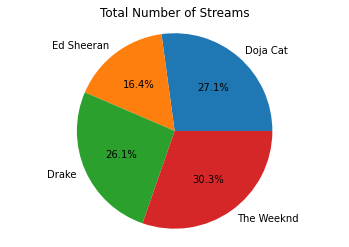

In [68]:
#Pie chart visualizing total number of streams per artist
df = pd.DataFrame([doja_maxstreams, sheeran_maxstreams, artist_totalstreams, weeknd_maxstreams])
artists = ["Doja Cat", "Ed Sheeran", "Drake", "The Weeknd"] 
streams = [doja_maxstreams, sheeran_maxstreams, artist_totalstreams, weeknd_maxstreams]
labels=artists
plt.pie(streams, labels=artists, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Total Number of Streams")
plt.savefig("totalpiechart.png")
plt.show()

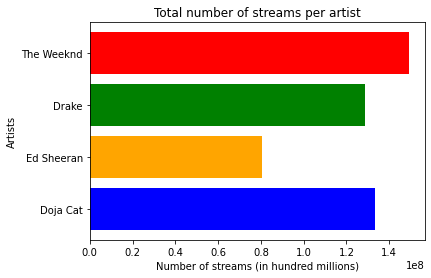

In [69]:
#Horizontal bar chart visualizing total number of streams per artist
plt.barh(artists, streams, color=("Blue", "Orange", "Green", "Red"))
plt.title("Total number of streams per artist")
plt.ylabel("Artists")
plt.xlabel("Number of streams (in hundred millions)")
plt.savefig("totalhorizbarchart.png")
plt.show()

In [70]:
weeknd_charted = weeknd_count["Number of Times Charted"].sum()
drake_charted = artist_count["Number of Times Charted"].sum()
sheeran_charted = sheeran_count["Number of Times Charted"].sum()
doja_charted = doja_count["Number of Times Charted"].sum()

print(weeknd_charted)
print(drake_charted)
print(sheeran_charted)
print(doja_charted)


269
200
314
185


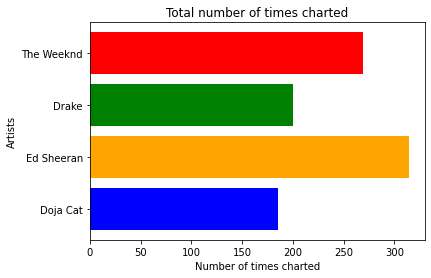

In [71]:
charted = [doja_charted, sheeran_charted, drake_charted, weeknd_charted]
#bar_graph.plot(kind="bar", x=artists, y=charted)
#plt.title("Total number of times charted")
#plt.ylabel("Number of times charted")
#plt.xlabel("Artists")
#plt.show()

plt.barh(artists, charted, color=("Blue", "Orange", "Green", "Red"))
plt.title("Total number of times charted")
plt.ylabel("Artists")
plt.xlabel("Number of times charted")
plt.savefig("totalchartedchart.png")
plt.show()

In [72]:
#followers_df = pd.DataFrame([doja_followers, sheeran_followers, artist_followers, weeknd_followers])

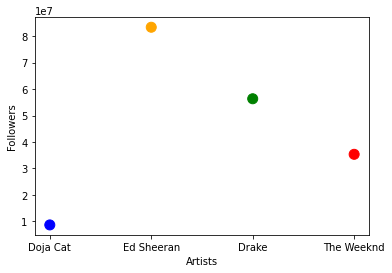

In [73]:
data={'Artists':['Doja Cat', 'Ed Sheeran', 'Drake',
              'The Weeknd'],
      'Followers':[8671649, 83337783, 56327031, 35340069]}
followers_df = pd.DataFrame(data = data);
followers_df.plot.scatter(x = 'Artists', y = 'Followers', s = 100, c=("Blue", "Orange", "Green", "Red"));
plt.savefig("maxfollowerschart.png")
plt.show()